In [2]:
import pandas as pd

df3=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/more_clean_Ok_50000k_32874.csv')
df3=df3[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]
df4=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Reaxys_water.csv')
df4=df4[['SMILES','Molecular Weight','Solubility (MCS): Solubility [g·l-1]']]

In [3]:
df3.shape

(32874, 6)

In [5]:
df3=df3[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]

In [8]:
df4=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Reaxys_water.csv')

In [78]:
df4.shape

(12248, 4)

In [9]:
df4=df4[['SMILES','Molecular Weight','Solubility (MCS): Solubility [g·l-1]']]

In [10]:
#### Function to convert smiles to canonical smiles 

from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
## Function to create canonical smiles 
def canon(smi):
    try:
        mol=smi2mol(smi, sanitize=True)
        smi_canon=mol2smi(mol, isomericSmiles=False, canonical=True)
        #smi_canon=mol2smi(mol, isomericSmiles=True,canonical=True) ### According to Sorkun 
        return(smi_canon)
    except:
        print("ERROR")
        return(smi)

In [12]:
#df3['smiles_canon'] = [canon(smi) for smi in df3.SMILES]
#df4['smiles_canon'] = [canon(smi) for smi in df4.SMILES]    

In [13]:
### Finding the matching rows Reaxys and Pubchem data  based on canonical smiles(Unique representation pf the smiles )
Match_rows = pd.merge(df3, df4, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows))


71


In [20]:
Match_rows['sol_final'] = pd.to_numeric(Match_rows['sol_final'], errors='coerce')
Match_rows['Solubility (MCS): Solubility [g·l-1]'] = pd.to_numeric(Match_rows['Solubility (MCS): Solubility [g·l-1]'], errors='coerce')

In [52]:
Match_rows['Error_gl_in_%']=abs(Match_rows['sol_final']- Match_rows['Solubility (MCS): Solubility [g·l-1]'])/ Match_rows['sol_final']*100

In [53]:
Match_rows[10:20]

,SMILES_x,Solubility1,Molecular_Weight,sol_final,smiles_canon,SMILES_y,Molecular Weight,Solubility (MCS): Solubility [g·l-1],Error_gl_in_%
10,COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...,31mg/mL,379.500,31.0000,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,COC1=C(OC)C=C2C(=O)C(CC3CCN(CC4=CC=CC=C4)CC3)C...,379.499,0.044700,99.855806
11,C1CC1C#CC2(C3=C(C=CC(=C3)Cl)NC(=O)O2)C(F)(F)F,19.6 [ug/mL] (The mean of the results at pH 7.4),315.678,0.0196,O=C1Nc2ccc(Cl)cc2C(C#CC2CC2)(C(F)(F)F)O1,FC(F)(F)[C@]1(OC(=O)NC2=CC=C(Cl)C=C12)C#CC1CC1,315.679,0.068000,246.938776
12,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,0.74mg/mL,336.479,0.7400,CCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1,CCC(=O)N(C1CCN(CCC2=CC=CC=C2)CC1)C1=CC=CC=C1,336.477,0.080755,89.087230
13,C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O,34.9 [ug/mL] (The mean of the results at pH 7.4),306.276,0.0349,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,OC(CN1C=NC=N1)(CN1C=NC=N1)C1=C(F)C=C(F)C=C1,306.275,5.550000,15802.578797
14,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,23.5 [ug/mL] (The mean of the results at pH 7.4),375.871,0.0235,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,375.871,0.010000,57.446809
15,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,23.5 [ug/mL] (The mean of the results at pH 7.4),375.871,0.0235,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,375.871,0.002500,89.361702
16,CC(=O)CCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,0.174 mg/mL at 20 °C,322.364,0.1740,CC(=O)CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,CC(=O)CCC1C(=O)N(N(C1=O)C1=CC=CC=C1)C1=CC=CC=C1,322.364,0.174000,0.000000
17,COC1=CC=CC=C1OCC(COC(=O)N)O,29.9 [ug/mL] (The mean of the results at pH 7.4),241.243,0.0299,COc1ccccc1OCC(O)COC(N)=O,COC1=C(OCC(O)COC(N)=O)C=CC=C1,241.244,9.746260,32496.187291
18,CN1CCC2=CC3=C(C(=C2C1C4C5=C(C(=C(C=C5)OC)OC)C(...,0.044 mg/mL at 20 °C,413.426,0.0440,COc1ccc2c(c1OC)C(=O)OC2C1c2c(cc3c(c2OC)OCO3)CCN1C,[H][C@@]1(OC(=O)C2=C(OC)C(OC)=CC=C12)[C@]1([H]...,413.427,0.100000,127.272727
19,C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O,0.123 mg/mL at 16 °C,274.272,0.1230,O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O,OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1,274.273,0.023000,81.300813


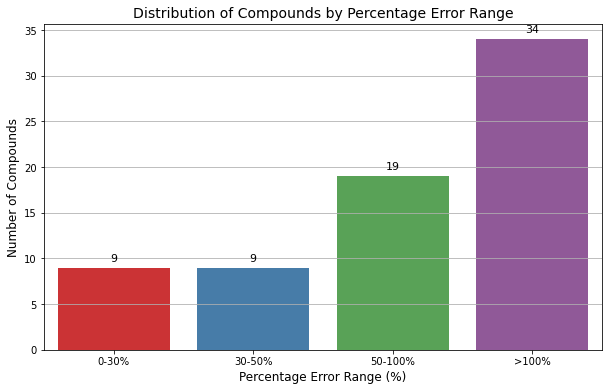

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows['Error_gl_in_Range%'] = pd.cut(Match_rows['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()


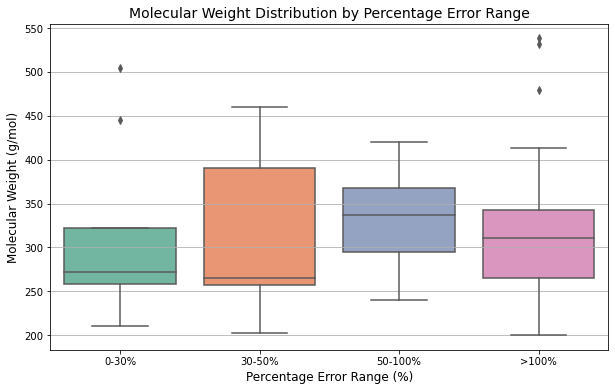

In [55]:
# Box plot of molecular weight grouped by error range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Error_gl_in_Range%', y='Molecular_Weight', data=Match_rows, palette='Set2')

# Adding labels and title
plt.title('Molecular Weight Distribution by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Molecular Weight (g/mol)', fontsize=12)
plt.grid(axis='y')

# Show plot
plt.show()


In [56]:
import pandas as pd


# Sort by 'Score' column in descending order
df_sorted = Match_rows.sort_values(by='Error_gl_in_%', ascending=True)

# View the result


In [57]:
df_sorted=df_sorted[['smiles_canon','Molecular_Weight','sol_final','Solubility (MCS): Solubility [g·l-1]','Error_gl_in_%']]

In [58]:
df_sorted

,smiles_canon,Molecular_Weight,sol_final,Solubility (MCS): Solubility [g·l-1],Error_gl_in_%
55,NC(CCSSCCC(N)C(=O)O)C(=O)O,268.360,0.2000,0.2000,0.000000
41,CCOC(=O)CCCCCCCCC(=O)OCC,258.358,0.0800,0.0800,0.000000
57,Cn1c(=O)c2c([nH]c(=O)n2C)n(C)c1=O,210.193,5.5000,5.5000,0.000000
16,CC(=O)CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,322.364,0.1740,0.1740,0.000000
1,CCCn1c(=O)c2[nH]c(C3CCCC3)nc2n(CCC)c1=O,304.394,0.0031,0.0033,6.451613
...,...,...,...,...,...
45,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,19.5000,62600.964630
24,O=c1[nH]c(=O)n(C2CCCO2)cc1F,200.169,0.0299,25.3000,84515.384615
63,Cc1cc(C)c2cc(C(=O)Nc3ccccc3)[nH]c2c1,264.328,0.0012,1.1181,93075.000000
46,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,29.3000,94112.218650


In [59]:
df_sorted.to_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Reaxys_Pubchem_71.csv')

In [60]:
def get_functional_groups(smiles):
    functional_groups = {
        # Polar functional groups
        'Hydroxyl Group': '[OH]',
        'Carbonyl Group': 'C=O',
        'Amide Group': 'C(=O)N',
        'Carboxyl Group': 'C(=O)[OH]',
        # Non-polar functional groups
        'Alkyl': '[R]', 
        'Aromatic Rings': 'c',
        'Alkene': 'C=C'
    }
    results = []
    for s in smiles:
        mol = Chem.MolFromSmiles(s)
        fg_presence = {fg: 1 if mol.HasSubstructMatch(Chem.MolFromSmarts(smarts)) else 0 for fg, smarts in functional_groups.items()}
        fg_presence['SMILES'] = s
        results.append(fg_presence)
        data=pd.DataFrame(results)
    return data.iloc[:, :-1]

In [70]:
df_sorted.reset_index(drop=True)

,smiles_canon,Molecular_Weight,sol_final,Solubility (MCS): Solubility [g·l-1],Error_gl_in_%
0,NC(CCSSCCC(N)C(=O)O)C(=O)O,268.360,0.2000,0.2000,0.000000
1,CCOC(=O)CCCCCCCCC(=O)OCC,258.358,0.0800,0.0800,0.000000
2,Cn1c(=O)c2c([nH]c(=O)n2C)n(C)c1=O,210.193,5.5000,5.5000,0.000000
3,CC(=O)CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,322.364,0.1740,0.1740,0.000000
4,CCCn1c(=O)c2[nH]c(C3CCCC3)nc2n(CCC)c1=O,304.394,0.0031,0.0033,6.451613
...,...,...,...,...,...
66,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,19.5000,62600.964630
67,O=c1[nH]c(=O)n(C2CCCO2)cc1F,200.169,0.0299,25.3000,84515.384615
68,Cc1cc(C)c2cc(C(=O)Nc3ccccc3)[nH]c2c1,264.328,0.0012,1.1181,93075.000000
69,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,29.3000,94112.218650


In [61]:
from rdkit import Chem

In [71]:
df_f=get_functional_groups(df_sorted.smiles_canon)

In [72]:
### Joining both 
df_combined = pd.concat([df_sorted, df_f], axis=1)


In [73]:
df_combined

,smiles_canon,Molecular_Weight,sol_final,Solubility (MCS): Solubility [g·l-1],Error_gl_in_%,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
0,O=[N+]([O-])c1ccc(Cl)c([N+](=O)[O-])c1,202.553,0.0138,0.008000,42.028986,1,1,0,1,0,0,0
1,CCCn1c(=O)c2[nH]c(C3CCCC3)nc2n(CCC)c1=O,304.394,0.0031,0.003300,6.451613,0,1,0,0,0,0,0
2,CCCSc1ccc2nc(NC(=O)OC)[nH]c2c1,265.338,0.0014,0.000796,43.142286,0,0,0,0,1,1,0
3,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1,310.400,0.0007,0.000350,50.000000,0,1,1,0,1,1,0
4,C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12,294.398,0.2000,0.028000,86.000000,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66,CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3.Cl,303.789,0.0125,17.900000,143100.000000,1,0,0,0,1,1,0
67,CC(CCC(=O)O)C1CCC2C3CC(O)C4CC(O)CCC4(C)C3CCC12C,392.580,0.0598,0.005890,90.150502,0,0,0,0,1,1,0
68,COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4...,459.506,0.1100,0.070000,36.363636,0,1,1,0,1,1,0
69,CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)[O-]....,356.379,75.0000,1900.000000,2433.333333,1,0,0,0,1,1,0


In [74]:
df_comb_sorted = df_combined.sort_values(by='Error_gl_in_%', ascending=True)

In [75]:
df_comb_sorted.reset_index(drop=True)

,smiles_canon,Molecular_Weight,sol_final,Solubility (MCS): Solubility [g·l-1],Error_gl_in_%,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
55,NC(CCSSCCC(N)C(=O)O)C(=O)O,268.360,0.2000,0.2000,0.000000,0,1,1,0,1,1,0
41,CCOC(=O)CCCCCCCCC(=O)OCC,258.358,0.0800,0.0800,0.000000,1,0,0,0,1,0,0
57,Cn1c(=O)c2c([nH]c(=O)n2C)n(C)c1=O,210.193,5.5000,5.5000,0.000000,0,0,0,0,1,1,0
16,CC(=O)CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,322.364,0.1740,0.1740,0.000000,0,1,1,0,1,1,0
1,CCCn1c(=O)c2[nH]c(C3CCCC3)nc2n(CCC)c1=O,304.394,0.0031,0.0033,6.451613,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,19.5000,62600.964630,0,0,0,0,1,1,0
24,O=c1[nH]c(=O)n(C2CCCO2)cc1F,200.169,0.0299,25.3000,84515.384615,1,0,0,0,1,1,1
63,Cc1cc(C)c2cc(C(=O)Nc3ccccc3)[nH]c2c1,264.328,0.0012,1.1181,93075.000000,1,0,0,0,1,1,0
46,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,0.0311,29.3000,94112.218650,1,0,0,0,1,1,0


In [76]:
# List of functional group columns
functional_groups = ['Hydroxyl Group','Carbonyl Group','Amide Group','Carboxyl Group','Alkyl','Aromatic Rings','Alkene']

# Calculate mean percentage error for each functional group
error_effect = {fg: df_combined[df_combined[fg] == 1]['Error_gl_in_%'].mean() for fg in functional_groups}
error_df = pd.DataFrame(list(error_effect.items()), columns=['Functional_Group', 'Mean_Percentage_Error'])

print(error_df)


  Functional_Group  Mean_Percentage_Error
0   Hydroxyl Group           15507.402371
1   Carbonyl Group            3183.459540
2      Amide Group            5740.617093
3   Carboxyl Group             764.597852
4            Alkyl            9532.033420
5   Aromatic Rings           11718.965484
6           Alkene           15511.500477


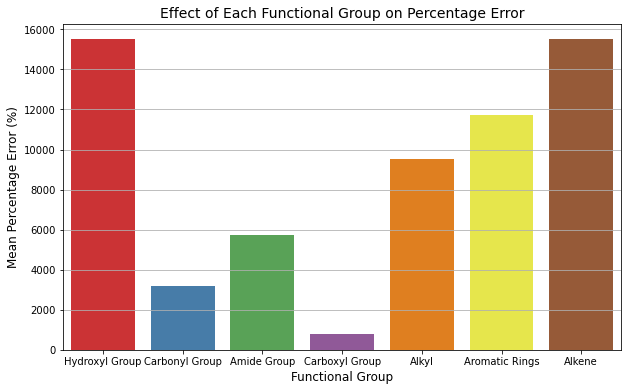

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of mean percentage error for each functional group
plt.figure(figsize=(10, 6))
sns.barplot(x='Functional_Group', y='Mean_Percentage_Error', data=error_df, palette='Set1')
plt.title('Effect of Each Functional Group on Percentage Error', fontsize=14)
plt.xlabel('Functional Group', fontsize=12)
plt.ylabel('Mean Percentage Error (%)', fontsize=12)
plt.grid(axis='y')
plt.show()


In [ ]:
### Comapring the compound having salts or without salts 

In [1]:
import pandas as pd

df3=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/more_clean_Ok_50000k_32874.csv')
df3=df3[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]
df4=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Reaxys_water.csv')
df4=df4[['SMILES','Molecular Weight','Solubility (MCS): Solubility [g·l-1]']]


In [6]:
df3['smiles_canon']= [canon(smi) for smi in df3.SMILES]

[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not removing hydrogen atom without neighbors
[14:41:55] WARNING: not r

In [3]:
def has_salts(smiles):
    # Check if the SMILES is not NaN and contains a '.'
    return pd.notnull(smiles) and '.' in smiles

# Apply function to the SMILES column and create a new column for salt presence
df4['has_salts'] = df4['SMILES'].apply(has_salts)

# Filter only the rows with salts
df_with_salts = df4[df4['has_salts']]
df_without_salts = df4[~df4['has_salts'] & df4['SMILES'].notnull()]
df_with_salts.reset_index(drop=True)
df_without_salts.reset_index(drop=True)


,SMILES,Molecular Weight,Solubility (MCS): Solubility [g·l-1],has_salts
0,OC1=CC(O)=C2C(OC(=C(O)C2=O)C2=CC=C(O)C(O)=C2)=C1,302.240,0.00051,False
1,OC1=CC(O)=C2C(OC(=C(O)C2=O)C2=CC=C(O)C(O)=C2)=C1,302.240,0.00108806,False
2,II,253.809,0.338074,False
3,II,253.809,0.304571,False
4,[H][C@@]12CC[C@](O)(C(=O)CO)[C@@]1(C)C[C@H](O)...,362.466,0.072,False
...,...,...,...,...
5948,CC(C)(OC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O)C1...,606.482,0.04,False
5949,CC(C)(O)C1=NC(=NC(NC2=CC=NC(=C2)C(F)(F)F)=N1)C...,444.339,0.006,False
5950,COC(=O)C1=CC(OC(C)=O)=C(OC2=CC=CC=C2)C(OC(C)=O...,344.321,0.158388,False
5951,COC(=O)C1=CC(O)=C(OC2=CC=CC=C2)C(O)=C1,260.246,0.102,False


In [14]:
print(df_with_salts.shape)
print(df_without_salts.shape)

(6293, 5)
(5953, 5)


In [4]:
#### Function to convert smiles to canonical smiles 

from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
## Function to create canonical smiles 
def canon(smi):
    try:
        mol=smi2mol(smi, sanitize=True)
        smi_canon=mol2smi(mol, isomericSmiles=False, canonical=True)
        #smi_canon=mol2smi(mol, isomericSmiles=True,canonical=True) ### According to Sorkun 
        return(smi_canon)
    except:
        print("ERROR")
        return(smi)
df_with_salts['smiles_canon'] = [canon(smi) for smi in df_with_salts.SMILES]
df_without_salts['smiles_canon'] = [canon(smi) for smi in df_without_salts.SMILES]

[14:37:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:34] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:34] Explicit valence for atom # 1 B, 4, is greater than permitted
[14:37:34] Explicit valence for atom # 2 Si, 8, is greater than permitted
[14:37:34] Explicit valence for atom # 2 Si, 8, is greater than permitted
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydrogen atom without neighbors
[14:37:34] WARNING: not removing hydroge

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR

[14:37:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 24 C, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 4 F, 2, is greater than permitted
[14:37:35] Explicit valence for


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 1 N, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 1 N, 5, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 11 N, 4, i

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:35] Explicit valence for atom # 2 B, 4, is greater than permitted
[14:37:35] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 2 B, 4, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 16 C, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 10 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 18 C, 5, is greater than permitted
[14:37:35] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] WARNING: not removing hydrogen atom without neighbors
[14:37:35] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 16 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 17 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[14:37:35] Explicit valence for atom # 1 C, 5, is great

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:36] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR

[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:36] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] Explicit valence for atom # 10 O, 4, is greater than permitted
[14:37:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydroge


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:36] Explicit valence for atom # 0 F, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 F, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 F, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 F, 2, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] Explicit valence for atom # 24 Cl, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 F, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:36] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:36] Explicit valence for atom # 5 C, 5, is greater than permitted
[14:37:36] Explicit valence for atom # 14 N, 4, is greater than permitt

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 20 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 22 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 14 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 13 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 15 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 11 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 19 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom # 15 O, 3, is greater than permitted
[14:37:36] Explicit valence for atom #

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:36] Explicit valence for atom # 1 B, 4, is greater than permitted
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:36] WARNING: not removing hydrogen atom without neighbors
[14:37:37] WARNING: not removing hydrogen atom without neighbors
[14:37:37] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:37] WARNING: not removing hydrogen atom without neighbors
[14:37:37] WARNING: not removing hydrogen atom without neighbors
[14:37:37] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 7 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 1 F, 2, is greater than permitted
[14:37:37] Explicit vale

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


/var/folders/k_/8s01c4dj0gnfx2n284nvm1t80000gn/T/ipykernel_93909/5271849.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_salts['smiles_canon'] = [canon(smi) for smi in df_with_salts.SMILES]
[14:37:37] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 8 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 8 C, 5, is greater than permitted


ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 4 C, 5, is greater than permitted


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 7 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 O, 3, is greater than permitted
[14:37:37] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:37:37] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 13 Cl, 2, is greater than permitted
[14:37:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:37:37] Explicit valence for atom # 0 Cl, 2,

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR

[14:37:38] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 13 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 9 O, 3, is greater than permitted
[14:37:38] Explicit valence for atom # 18 H, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Be, 6, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 0


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 20 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 9 F, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 12 B, 4, is greater than permitted


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:38] Explicit valence for atom # 23 H, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 4 Ga, 6, is greater than permitted
[14:37:38] Explicit valence for atom # 18 H, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 30 H, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 14 N, 4, is greater than permitted
[14:37:38] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Br, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 5 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 9 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom #

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR

[14:37:38] Explicit valence for atom # 11 O, 4, is greater than permitted
[14:37:38] Explicit valence for atom # 13 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 13 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 12 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 6 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom # 17 C, 5, is greater than permitted
[14:37:38] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:38] Explicit valence for atom #


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


[14:37:39] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:39] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[14:37:39] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:39] Explicit valence for atom # 8 Cl, 2, is greater than permitted
[14:37:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[14:37:39] Explicit valence for atom # 10 C, 5, is greater than permitted
[14:37:39] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:37:39] Explicit valence for atom # 8 B, 4, is greater than permitted
[14:37:39] Explicit valence for atom # 9 B, 4, is greater than permitted
[14:37:39] Explicit valence for atom # 12 B, 4, is greater than permitted
[14:37:39] Explicit valence for atom # 15 B, 4, is greater than permitted
[14:37:39] Explicit valence for atom # 12 Cl, 2, is greater than permitted
[14:37:39] Explicit valence for atom # 12 Cl, 2, is greater than permitted
/var/folders/k_/8s01c4dj0gnfx2n284nvm1t8

In [7]:
### Finding the matching rows Reaxys and Pubchem data  based on canonical smiles(Unique representation pf the smiles )
Match_rows1 = pd.merge(df_with_salts, df3, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows1))
Match_rows2 = pd.merge(df_without_salts, df3, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows2))

7
64


In [10]:
Match_rows1['Lit_gram_liter']=(10**Match_rows1['sol_final']*Match_rows1['Molecular Weight'])
Match_rows2['Lit_gram_liter']=(10**Match_rows2['sol_final']*Match_rows2['Molecular Weight'])
Match_rows1['Lit_gram_liter'] = pd.to_numeric(Match_rows1['Lit_gram_liter'], errors='coerce')
Match_rows1['Solubility (MCS): Solubility [g·l-1]'] = pd.to_numeric(Match_rows1['Solubility (MCS): Solubility [g·l-1]'], errors='coerce')
Match_rows1['Error_gl_in_%']=abs(Match_rows1['Lit_gram_liter']- Match_rows1['Solubility (MCS): Solubility [g·l-1]'])/ Match_rows2['Lit_gram_liter']*100
Match_rows2['Lit_gram_liter'] = pd.to_numeric(Match_rows2['Lit_gram_liter'], errors='coerce')
Match_rows2['Solubility (MCS): Solubility [g·l-1]'] = pd.to_numeric(Match_rows2['Solubility (MCS): Solubility [g·l-1]'], errors='coerce')
Match_rows2['Error_gl_in_%']=abs(Match_rows2['Lit_gram_liter']- Match_rows2['Solubility (MCS): Solubility [g·l-1]'])/ Match_rows2['Lit_gram_liter']*100

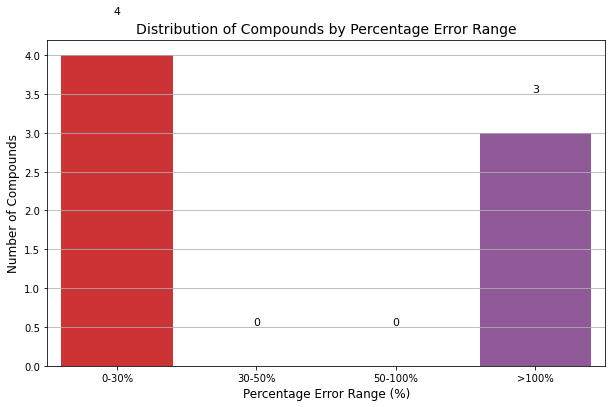

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows1['Error_gl_in_Range%'] = pd.cut(Match_rows1['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows1['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()


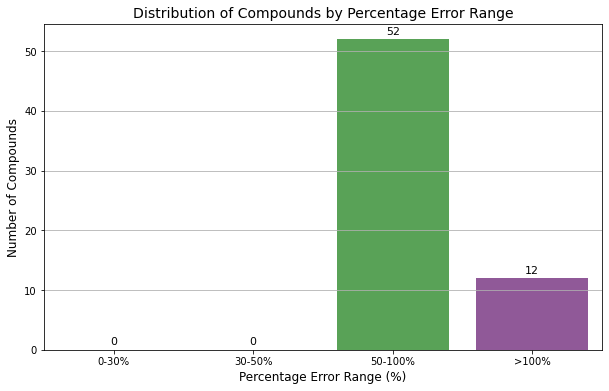

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows2['Error_gl_in_Range%'] = pd.cut(Match_rows2['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows2['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()
